In [1]:
%matplotlib inline
from vis_common import *

Overall average win rate: 0.52%


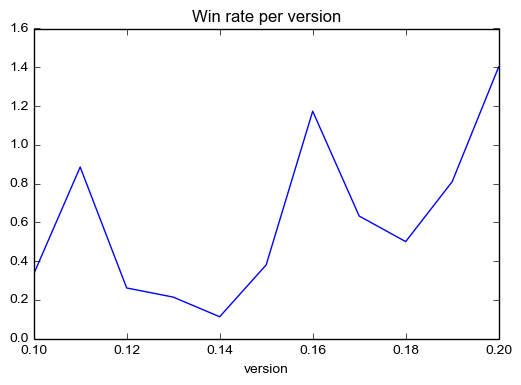

In [2]:
print 'Overall average win rate: {:.2f}%'.format(f['won'].mean() * 100)

wr_per_version = f.groupby('version')['won'].mean() * 100
wr_per_version.plot(title='Win rate per version');

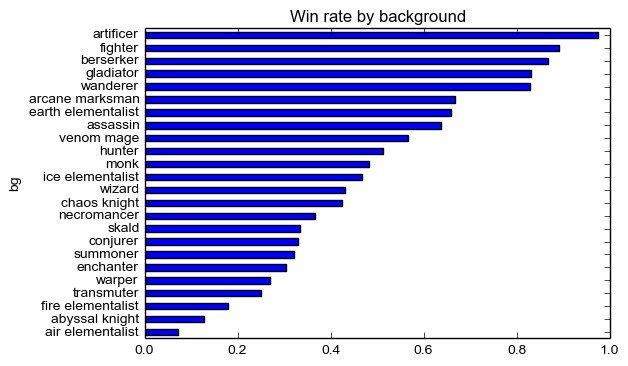

In [3]:
# TODO: Would be kinda nice to colour or group bgs everywhere according to the 
# grouping in game in the character select screen (warriors, mages, warrior-mages, other)
# TODO: Also show pick rate in the same chart? stacked/side-by-side bars?
plot_winrate(f, 'bg', 'Win rate by background')

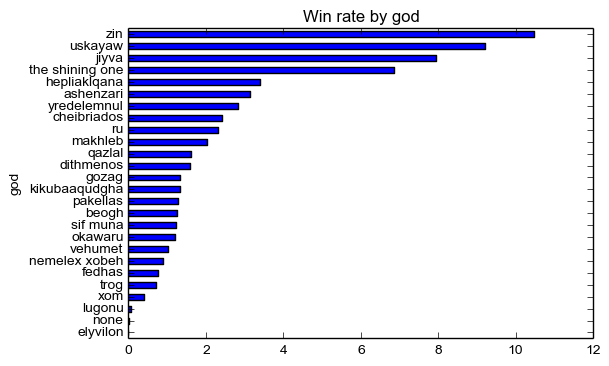

In [5]:
# TODO: replace nan's with actual category values so we can include atheists in the groupby
plot_winrate(f, 'god')
# TODO: filter by those who have seen the temple? (to avoid artificially low win rate for starter gods)

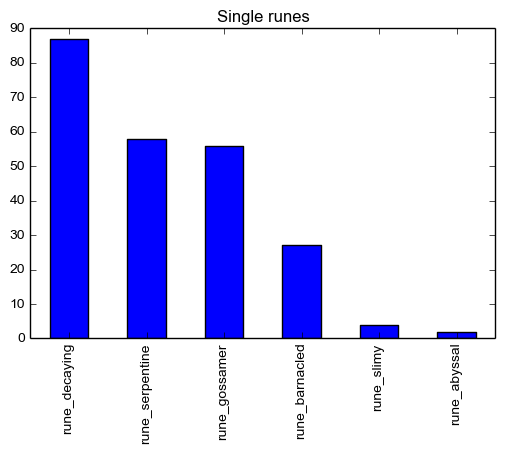

In [6]:
def nrunes(n):
    return f['nrunes'] == n

rune_columns = [col for col in f.columns if col.startswith('rune_')]
# TODO: would be more interesting (or at least more principled) to track *first* runes
# (thus including runs that went on to get more than 1 rune). Need to parse the notes.
f[nrunes(1)][rune_columns].sum().where(lambda x: x > 0).dropna().sort_values(ascending=False)\
    .plot.bar(title="Single runes");

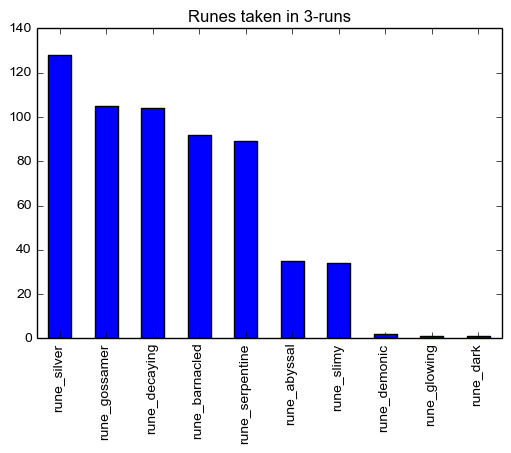

In [7]:
f[nrunes(3)][rune_columns].sum().where(lambda x: x > 0).dropna().sort_values(ascending=False)\
    .plot.bar(title="Runes taken in 3-runs");
# TODO: I think vaults was made harder at some point between .10 and .20? It'd be
# interesting to compare silver-rune-takeage over versions

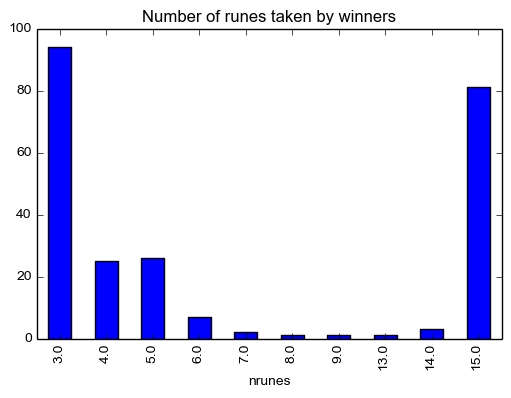

In [8]:
f[iwon].groupby('nrunes').size().plot.bar(title='Number of runes taken by winners');